In [21]:
# STEP 1: Import packages
from plantcv import plantcv as pcv
import matplotlib

In [32]:
# import pickle as pkl
# from skimage import img_as_ubyte
# rgb_name ="FLIR0716_RGB.pkl"
# loaded = pkl.load(open(rgb_name,"rb"))
# rgb_im = loaded["rgb_crop"]

# pcv.print_image(img_as_ubyte(rgb_im),"rgb.png")

In [33]:
# STEP 2: Set global variables
matplotlib.rcParams["figure.figsize"] = [8,8]
therm_img = "therm.csv"
rgb_img = "rgb.png"
pcv.params.debug = "plot"

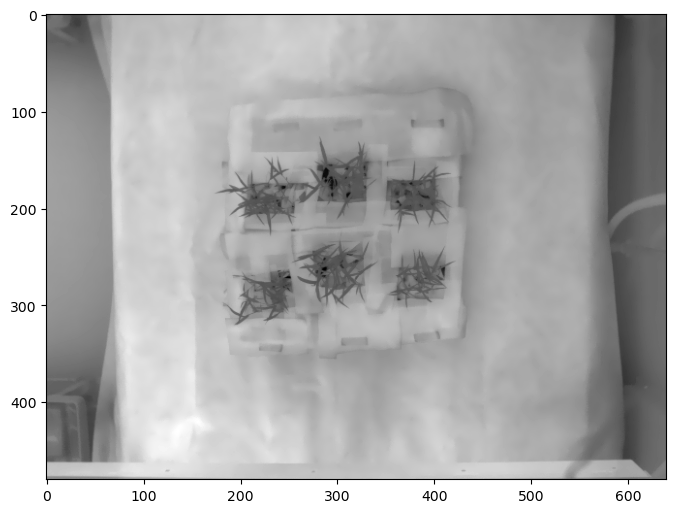

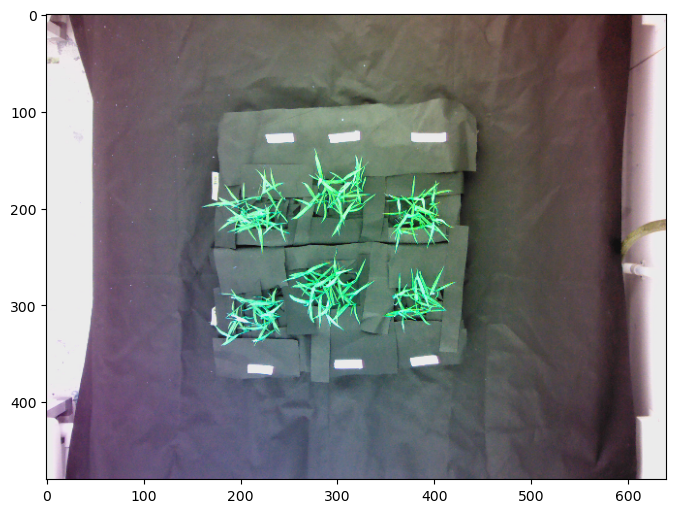

In [34]:
# STEP 3: Read thermal and RGB images
img_therm, path_therm, filename_therm = pcv.readimage(filename=therm_img, mode="csv")
img_rgb, path_rgb, filename_rgb = pcv.readimage(filename=rgb_img, mode="rgb")

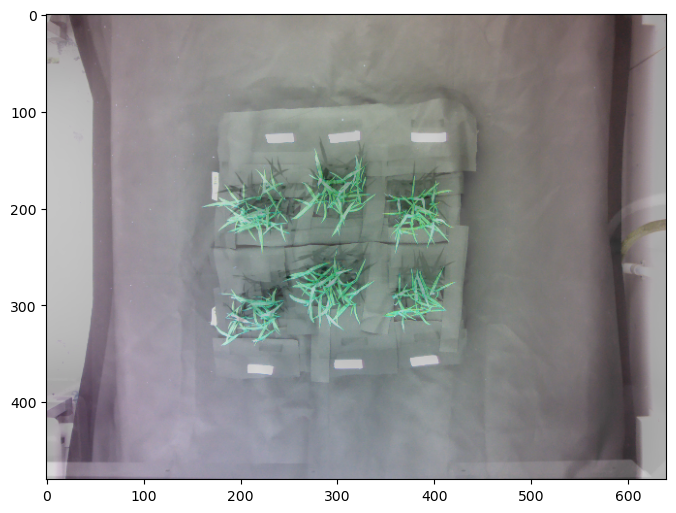

In [38]:
# STEP 4: Overlay the thermal image on top of the RGB image (super-imposed image)
pcv.params.debug = None
img_therm_ = pcv.transform.rescale(img_therm)
pcv.params.debug = "plot"
img_blend = pcv.visualize.overlay_two_imgs(img_rgb, img_therm_)

In [19]:
# STEP 5: Prepare coordinates of landmark pairs
pts_therm = [(177.65741935483868, 182.10129032258055),
  (279.39677419354837, 131.2316129032257),
  (377.5025806451613, 156.6664516129032),
  (412.0212903225806, 165.75032258064505),
  (304.83161290322585, 332.89354838709676),
  (330.2664516129032, 332.89354838709676),
  (582.7980645161291, 234.78774193548384),
             (100,150)]

pts_rgb = [(165.4354838709678, 196.6354838709678),
  (278.0754838709679, 145.765806451613),
  (379.8148387096776, 173.0174193548388),
  (417.9670967741938, 185.7348387096775),
  (298.0600000000002, 356.51161290322585),
  (327.1283870967743, 356.51161290322585),
  (596.0109677419357, 254.77225806451617),
          (100,180)]

In [39]:
# STEP 6: Calculate the projective transformation from the thermal image to the RGB image, 
# and warp the RGB image to regist it to the thermal image
mat, rgb_warped = pcv.transform.warp_align(img=img_rgb,
                                refimg=im_therm,
                                pts=pts_rgb,
                                refpts=pts_therm)

In [ ]:
# STEP 7: Prepare coordinates of landmark pairs